# 1. 우리동네 인구분석

In [1]:
#데이터 불러오기
#서울특별시 강동구 명일제1동(1174053000)
import csv

df = open('../[day1] handout/age.csv', encoding = 'CP949')
data = csv.reader(df)
data = list(data)

In [2]:
result = []

for k in data:
    if '명일제1동' in k[0]:
        for i in k[3:]:
            result.append(int(i.replace(',','')))
            
print(result)

[210, 192, 173, 188, 239, 221, 257, 236, 229, 210, 208, 214, 234, 264, 253, 265, 285, 262, 287, 289, 349, 313, 323, 304, 318, 316, 301, 351, 379, 359, 367, 378, 385, 403, 416, 435, 444, 467, 464, 461, 448, 398, 381, 362, 366, 433, 467, 458, 478, 505, 467, 446, 429, 385, 381, 375, 353, 404, 392, 483, 403, 405, 388, 446, 374, 417, 340, 273, 307, 188, 240, 228, 205, 206, 146, 120, 144, 123, 109, 78, 100, 68, 78, 69, 51, 58, 39, 35, 35, 27, 22, 25, 14, 18, 12, 6, 7, 3, 3, 1, 10]


꺾은선 그래프 그리기

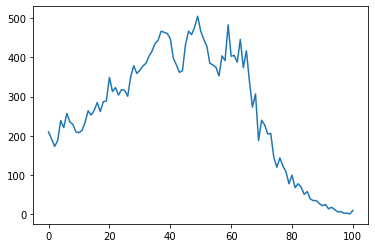

In [3]:
import matplotlib.pyplot as plt

plt.plot(result)
plt.show()

플롯 제목, 라벨, 폰트 수정하기

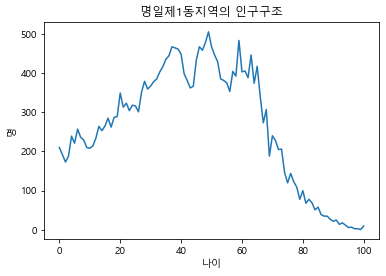

In [6]:
name = '명일제1동'
result = []
for k in data:
    if name in k[0]:
        for i in k[3:]:
            result.append(int(i.replace(',','')))

plt.rc('font', family = 'Malgun Gothic') # 폰트 변경

plt.title(name + '지역의 인구구조')
plt.plot(result)
plt.xlabel('나이')
plt.ylabel('명')
plt.show()

bar 그래프 그리기

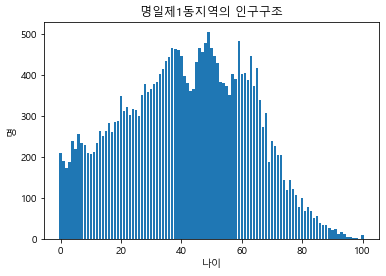

In [7]:
plt.title(name + '지역의 인구구조')
plt.bar(range(101),result)
plt.xlabel('나이')
plt.ylabel('명')
plt.show()

옆으로 90도 회전된 bar 그래프 그리기

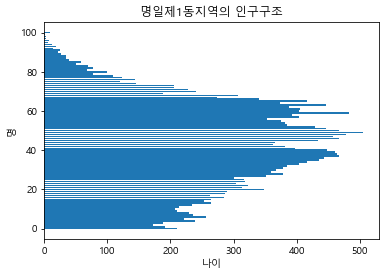

In [8]:
plt.title(name + '지역의 인구구조')
plt.barh(range(101),result)
plt.xlabel('나이')
plt.ylabel('명')
plt.show()

In [9]:
whos

Variable   Type             Data/Info
-------------------------------------
csv        module           <module 'csv' from 'D:\\I<...>\Anaconda3\\lib\\csv.py'>
data       list             n=3828
df         TextIOWrapper    <_io.TextIOWrapper name='<...>ode='r' encoding='CP949'>
i          str              10
k          list             n=104
name       str              명일제1동
plt        module           <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
result     list             n=101


['서울특별시 강동구 명일제1동(1174053000)', '12,924', '12,924', '100', '94', '92', '91', '129', '122', '127', '126', '125', '112', '97', '109', '121', '134', '135', '152', '152', '139', '154', '151', '166', '171', '171', '164', '171', '156', '158', '158', '179', '164', '176', '188', '202', '189', '226', '224', '216', '229', '238', '243', '220', '187', '175', '172', '195', '199', '209', '210', '232', '254', '233', '215', '191', '190', '180', '177', '179', '203', '177', '213', '172', '191', '168', '210', '181', '196', '166', '141', '140', '91', '110', '119', '112', '99', '67', '58', '66', '59', '53', '32', '49', '36', '29', '27', '17', '16', '8', '11', '8', '7', '4', '5', '2', '4', '3', '0', '3', '0', '0', '0', '2', '13,557', '13,557', '110', '98', '81', '97', '110', '99', '130', '110', '104', '98', '111', '105', '113', '130', '118', '113', '133', '123', '133', '138', '183', '142', '152', '140', '147', '160', '143', '193', '200', '195', '191', '190', '183', '214', '190', '211', '228', '238', '226', 

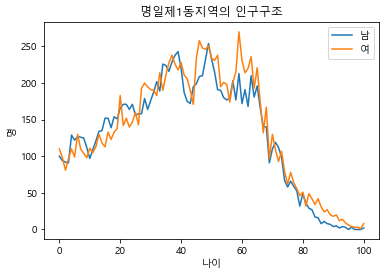

In [13]:
df2 = open('../[day1] handout/gender.csv', encoding = 'CP949')
data2 = csv.reader(df2)
data2 = list(data2)
name = '명일제1동'
male = []
female = []

for k in data2:
    if name in k[0]:
        print(k)
        for i in k[3:104]:
            male.append(int(i.replace(',','')))
        for i in k[106:]:
            female.append(int(i.replace(',','')))

plt.title(name + '지역의 인구구조')
plt.plot(male)
plt.plot(female)
plt.xlabel('나이')
plt.ylabel('명')
plt.legend(['남','여'])
plt.show()

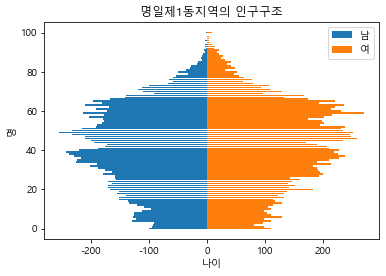

In [21]:
plt.rcParams['axes.unicode_minus'] = False

plt.title(name + '지역의 인구구조')
plt.barh(range(101),[(-1)*i for i in male])
plt.barh(range(101),female)
plt.xlabel('나이')
plt.ylabel('명')
plt.legend(['남','여'])
plt.show()

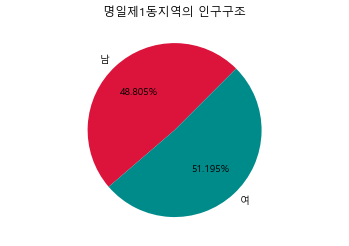

In [22]:
size = []

for k in data2:
    if name in k[0]:
        z = 0
        h = 0
        for i in range(101):
            z += int(k[i+3].replace(',',''))
            h += int(k[i+106].replace(',',''))
        break
size.append(z)
size.append(h)
            

color = ['crimson','darkcyan']
plt.axis('equal')
plt.pie(size, labels = ['남','여'], autopct = '%.3f%%', colors = color, startangle = 45)

plt.title(name + '지역의 인구구조')
plt.show()

## 우리동네와 비슷한 지역 찾아보기 using NUMPY

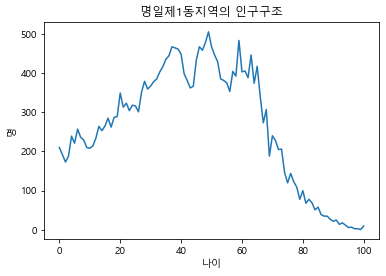

In [24]:
plt.rc('font', family = 'Malgun Gothic') # 폰트 변경

plt.title(name + '지역의 인구구조')
plt.plot(result)
plt.xlabel('나이')
plt.ylabel('명')
plt.show()

In [26]:
import numpy as np
mins = 1
result_name = ''
res = 0

for k in data:
    if name in k[0]:
        result = np.array([i.replace(',','') for i in k[3:]], dtype=int) / int(k[2].replace(',',''))


# 관심 지역과 비슷한 인구구조를 가진 지역
for n in data[1:]:
    area = np.array([i.replace(',','') for i in n[3:]], dtype=int) / int(n[2].replace(',',''))
    s = np.sum((result - area)**2)
    
    if s < mins and name not in n[0]:
        mins = s
        result_name = n[0]
        res = area

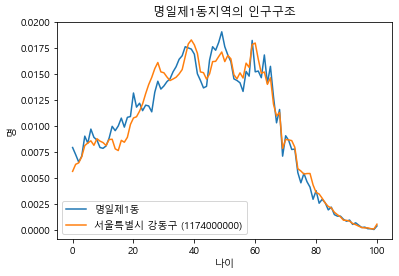

In [27]:
plt.rc('font', family = 'Malgun Gothic') # 폰트 변경

plt.title(name + '지역의 인구구조')
plt.plot(result, label = name)
plt.plot(res, label = result_name)
plt.xlabel('나이')
plt.ylabel('명')
plt.legend()
plt.show()

## 우리동네와 비슷한 지역 찾아보기 using PANDAS

In [28]:
import pandas as pd

df = pd.read_csv('../[day1] handout/age.csv', encoding='cp949', index_col = 0)
df.head()

,2020년09월_계_총인구수,2020년09월_계_연령구간인구수,2020년09월_계_0세,2020년09월_계_1세,2020년09월_계_2세,2020년09월_계_3세,2020년09월_계_4세,2020년09월_계_5세,2020년09월_계_6세,2020년09월_계_7세,...,2020년09월_계_91세,2020년09월_계_92세,2020년09월_계_93세,2020년09월_계_94세,2020년09월_계_95세,2020년09월_계_96세,2020년09월_계_97세,2020년09월_계_98세,2020년09월_계_99세,2020년09월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),"9,699,232","9,699,232","46,381","51,544","54,284","59,088","66,949","68,826","68,668","70,428",...,"8,334","6,512","5,036","3,400","2,666","2,035","2,056","1,403","1,033","6,678"
서울특별시 종로구 (1111000000),"149,952","149,952",523,582,598,693,825,816,880,870,...,195,145,132,91,81,55,56,60,37,271
서울특별시 종로구 청운효자동(1111051500),"12,479","12,479",54,64,60,85,82,102,89,93,...,17,6,6,11,6,5,5,4,2,19
서울특별시 종로구 사직동(1111053000),"9,568","9,568",31,38,46,51,64,74,77,70,...,26,9,10,9,8,2,8,3,2,20
서울특별시 종로구 삼청동(1111054000),"2,692","2,692",7,5,7,12,6,11,13,11,...,2,5,6,1,2,2,1,2,1,6


In [29]:
df.columns

Index(['2020년09월_계_총인구수', '2020년09월_계_연령구간인구수', '2020년09월_계_0세',
       '2020년09월_계_1세', '2020년09월_계_2세', '2020년09월_계_3세', '2020년09월_계_4세',
       '2020년09월_계_5세', '2020년09월_계_6세', '2020년09월_계_7세',
       ...
       '2020년09월_계_91세', '2020년09월_계_92세', '2020년09월_계_93세', '2020년09월_계_94세',
       '2020년09월_계_95세', '2020년09월_계_96세', '2020년09월_계_97세', '2020년09월_계_98세',
       '2020년09월_계_99세', '2020년09월_계_100세 이상'],
      dtype='object', length=103)

전처리

In [31]:
df = df.replace(',', '', regex=True).astype(int)
col_names = df.columns
col_names = list(col_names)
col_names = [i.replace('2020년09월_계_','') for i in col_names]
df.columns = col_names
df = df.div(df['총인구수'], axis =0)     # 전체 데이터를 총인구수로 나눠서 비율로 변환
del df['총인구수'], df['연령구간인구수']  # 총인구수, 연령구간인구수 열 삭제

In [33]:
whos

Variable      Type             Data/Info
----------------------------------------
area          ndarray          101: 101 elems, type `float64`, 808 bytes
col_names     list             n=103
color         list             n=2
csv           module           <module 'csv' from 'D:\\I<...>\Anaconda3\\lib\\csv.py'>
data          list             n=3828
data2         list             n=3828
df            DataFrame                                 <...>[3827 rows x 101 columns]
df2           TextIOWrapper    <_io.TextIOWrapper name='<...>ode='r' encoding='CP949'>
female        list             n=101
h             int              13557
i             int              100
k             list             n=104
male          list             n=101
mins          float64          0.00012234542451496143
n             list             n=104
name          str              명일제1동
np            module           <module 'numpy' from 'D:\<...>ges\\numpy\\__init__.py'>
pd            module           <module

In [34]:
a = df.index.str.contains(name) # 해당 행을 찾아서 해당 지역의 인구 구조를 저장
df2 = df[a]
df2

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 강동구 명일제1동(1174053000),0.00793,0.00725,0.006533,0.007099,0.009025,0.008346,0.009705,0.008912,0.008648,0.00793,...,0.000944,0.000529,0.00068,0.000453,0.000227,0.000264,0.000113,0.000113,0.000038,0.000378


<Figure size 6480x720 with 0 Axes>

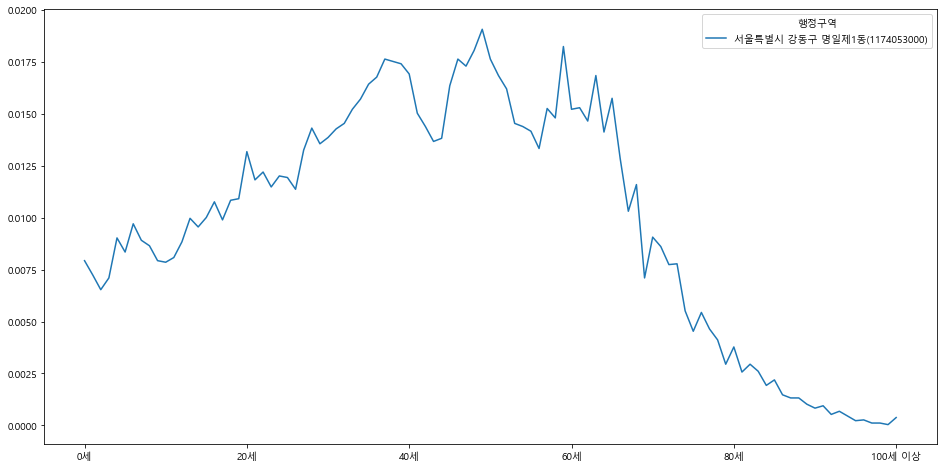

In [35]:
plt.figure(figsize = (90,10))            

plt.rcParams['figure.figsize'] = [16,8]

df2.T.plot()
plt.show()

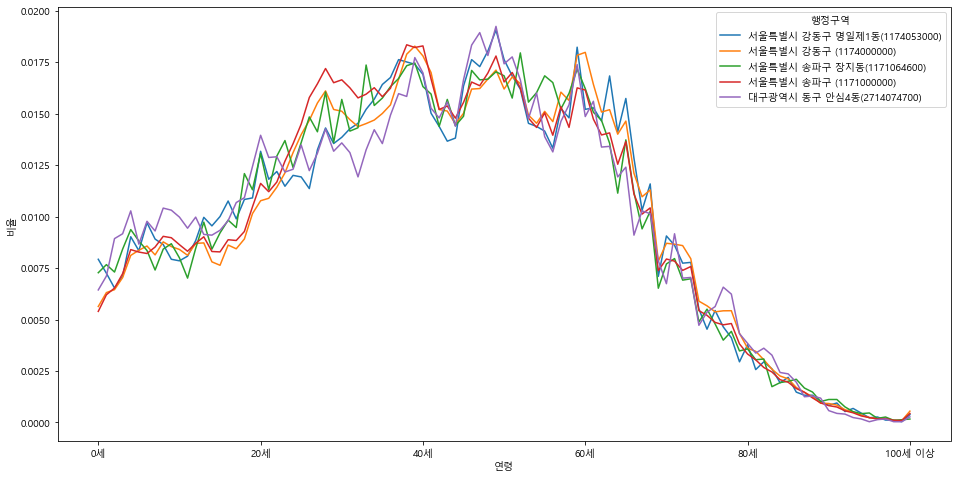

In [36]:
plt.rc('font', family ='Malgun Gothic')
plt.rcParams['figure.figsize'] = [16,8]

df.loc[np.power(df.sub(df2.iloc[0], axis = 1), 2).sum(axis = 1).sort_values().index[:5]].T.plot()
plt.xlabel('연령')
plt.ylabel('비율')
plt.show()

# 2. Titanic

In [40]:
import sklearn
print(sklearn.__version__)
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import seaborn as sns

0.23.1


In [42]:
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


전처리

In [43]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

titanic_df.isnull().sum().sum() #확인

0

In [44]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
titanic_df.describe() # 통계지표 확인

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

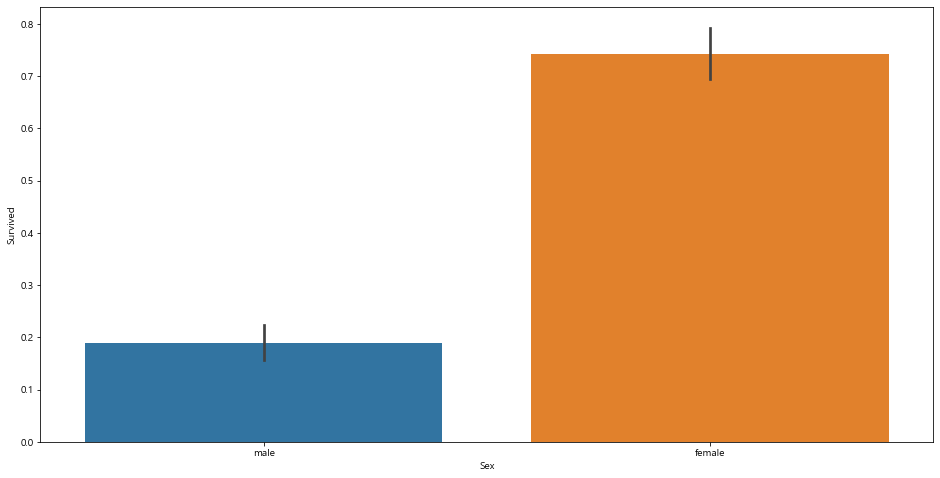

In [47]:
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df)

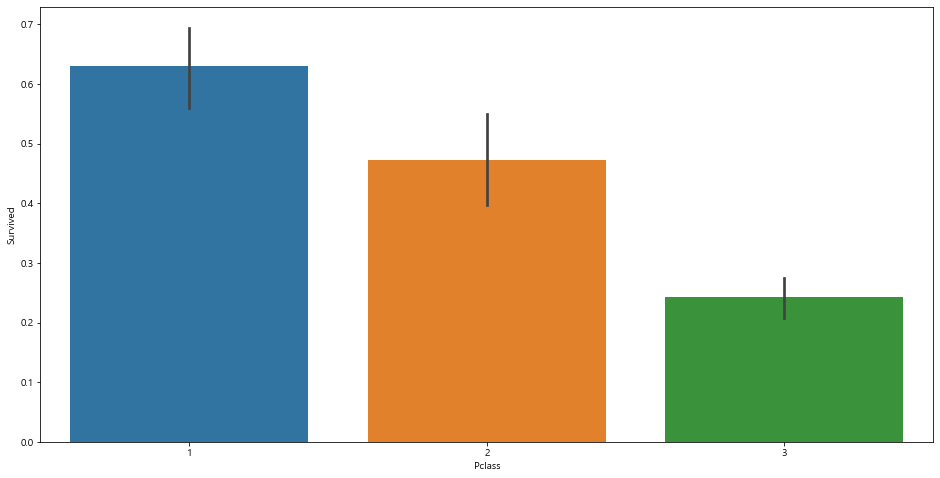

In [48]:
sns.barplot(x = 'Pclass', y = 'Survived', data = titanic_df)

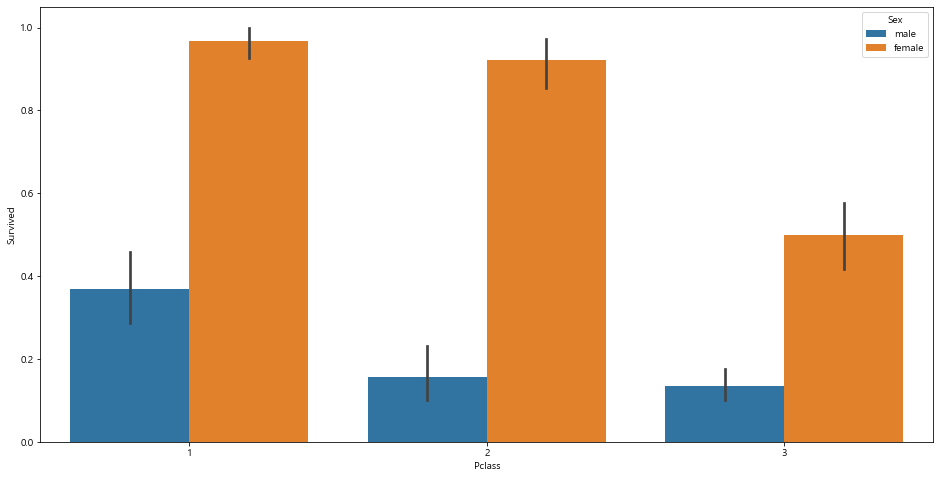

In [49]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic_df)

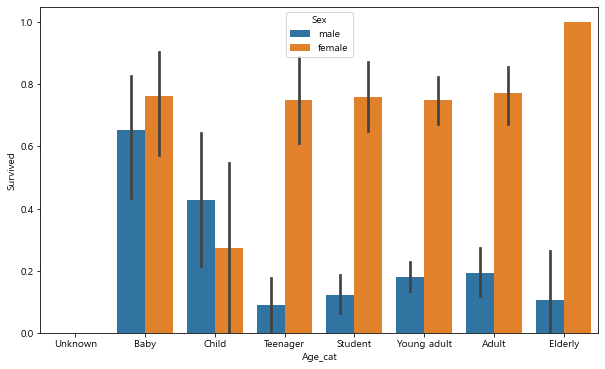

In [50]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    return cat

group_names = ['Unknown','Baby','Child','Teenager','Student','Young adult','Adult','Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

plt.figure(figsize=(10,6))
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = titanic_df, order = group_names)


라벨 인코딩

In [54]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
def encoder_feature(data_df):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(data_df[feature])
        data_df[feature] = le.transform(data_df[feature])
    return data_df


titanic_df = encoder_feature(titanic_df)
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young adult


전처리 함수로 만들기

In [56]:
def fill_na(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    return df

def drop_feature(df):
    df.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)
    return df

def encoder_feature(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Sex', 'Cabin', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def preprocessing_feature(df):
    df = fill_na(df)
    df = drop_feature(df)
    df = encoder_feature(df)
    return df

전처리 하기

In [57]:
titanic_df = pd.read_csv('titanic_train.csv')

y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = preprocessing_feature(X_titanic_df)

X_titanic_df.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


셋 나누기

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 10)

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=10)
rf_clf = RandomForestClassifier(random_state=10)
lr_clf = LogisticRegression(random_state=10)

# Decision Tree
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('Decision Tree의 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# Random Forest
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('Random Forest의 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# Logistic regression
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('Logistic regression의 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

Decision Tree의 정확도 : 0.7933
Random Forest의 정확도 : 0.8212
Logistic regression의 정확도 : 0.8268


D:\Installation\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 평가지표 만들기

In [60]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    def fit(self, X , y=None):
        pass
    def predict(self, X):
        pred = np.zeros( ( X.shape[0], 1 ))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        
        return pred

In [61]:
myclf = MyDummyClassifier()
myclf.fit(X_train ,y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test , mypredictions)))

Dummy Classifier의 정확도는: 0.8212


In [62]:
class MyFakeClassifier2(BaseEstimator):
    def fit(self,X,y):
        pass
    def predict(self,X):
        return np.zeros( (len(X), 1) , dtype=bool)

In [78]:
from sklearn.datasets import load_digits
digits = load_digits()

print(digits.data)
print("--------digits.data.shape:", digits.data.shape)
print(digits.target)
print("--------digits.target.shape:", digits.target.shape)

y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

fakeclf = MyFakeClassifier2()
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test , fakepred)))

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
--------digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
--------digits.target.shape: (1797,)
레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0 과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900


In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test , fakepred, labels=[1,0])

array([[  0,  45],
       [  0, 405]], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score, precision_score , recall_score

print("정밀도 Precision:", precision_score(y_test, fakepred))
print("재현율 Recall:", recall_score(y_test, fakepred))

정밀도 Precision: 0.0
재현율 Recall: 0.0


In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, fakepred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.90      1.00      0.95       405
     class 1       0.00      0.00      0.00        45

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.81      0.90      0.85       450



In [70]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred, labels = [1,0])
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('Confusion Matrix')
    print()
    print(confusion)
    print()
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [71]:
whos

Variable                 Type                      Data/Info
------------------------------------------------------------
BaseEstimator            type                      <class 'sklearn.base.BaseEstimator'>
DecisionTreeClassifier   ABCMeta                   <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
LabelEncoder             type                      <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
LogisticRegression       type                      <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
MyDummyClassifier        type                      <class '__main__.MyDummyClassifier'>
MyFakeClassifier2        type                      <class '__main__.MyFakeClassifier2'>
OneHotEncoder            type                      <class 'sklearn.preproces<...>_encoders.OneHotEncoder'>
RandomForestClassifier   ABCMeta                   <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
X_test                   ndarray                   450x64: 28800 elems, type `f

In [73]:
lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

Confusion Matrix

[[ 43   2]
 [  4 401]]

정확도: 0.9867, 정밀도: 0.9149, 재현율: 0.9556


D:\Installation\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [74]:
from sklearn.metrics import f1_score 
f1 = f1_score(y_test , pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.9348


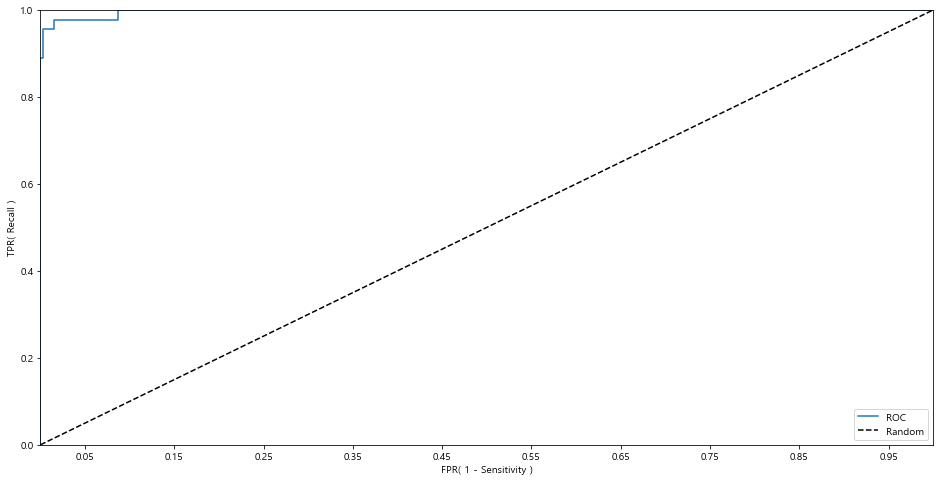

In [75]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , pred_proba_c1):
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    plt.plot(fprs , tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

오차 행렬
[[ 43   2]
 [  4 401]]
정확도: 0.9867, 정밀도: 0.9149, 재현율: 0.9556,          F1: 0.9348, AUC:0.9976


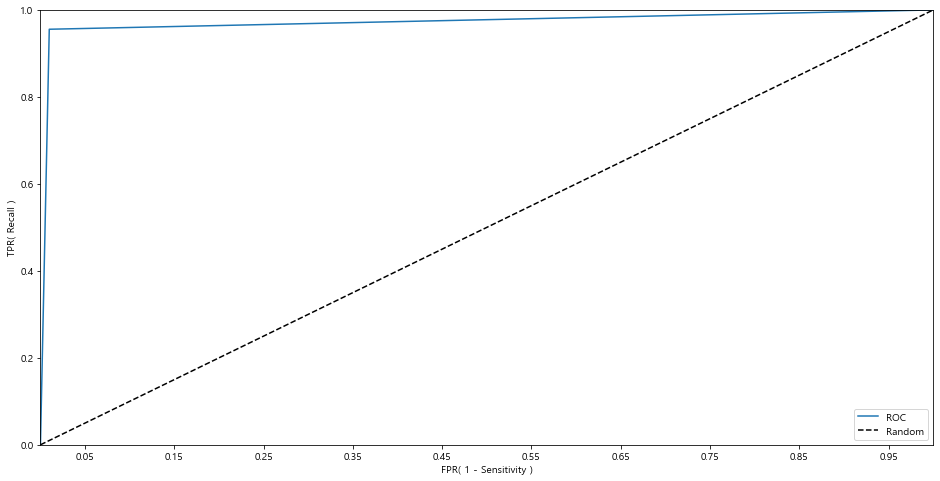

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]
    
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred, labels=[1,0])
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)

    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
get_clf_eval(y_test, pred, pred_proba_class1)
roc_curve_plot(y_test, pred)

D:\Installation\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


오차 행렬

[[104  14]
 [ 13  48]]

정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869, F1: 0.7805, AUC:0.8341


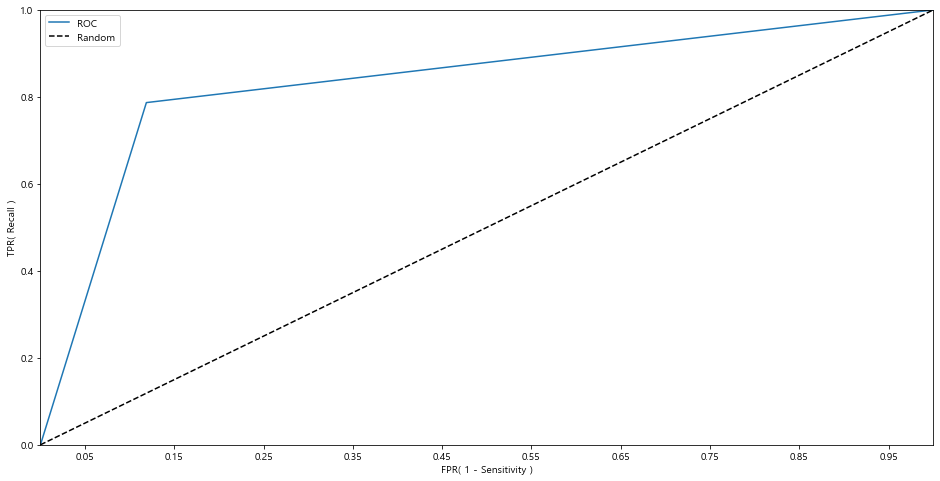

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)

    print('오차 행렬')
    print()
    print(confusion)
    print()
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

titanic_df = pd.read_csv('titanic_train.csv')

y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)

get_clf_eval(y_test , pred)
roc_curve_plot(y_test , pred)

# 3. LSTM

필요한 패키지 import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import *

from datetime import datetime, timedelta, timezone

Dataload

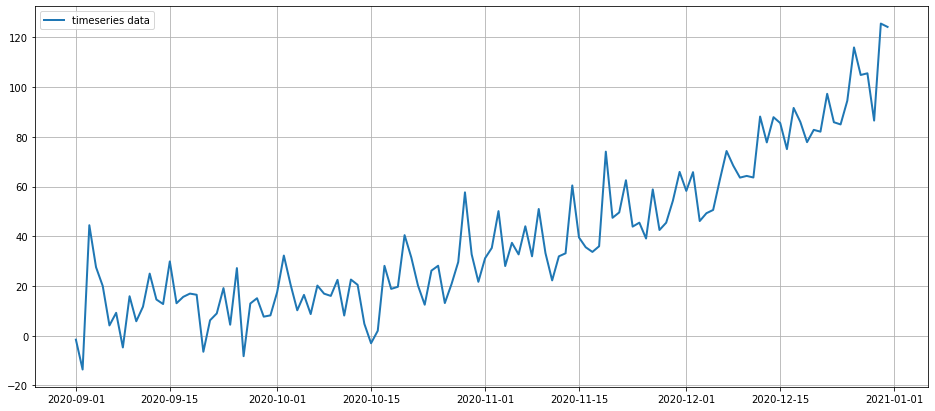

In [16]:
df = pd.read_csv('time_series_samp.csv', header = None)

# 컬럼명 정의
df.columns = ['date','value']

# 인덱스 정의
df.index = df["date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

# 불필요한 컬럼 제거
df = df.drop(['date'], axis=1)

# 시각화 옵션
plt.rcParams["figure.figsize"] = (16,7)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = True

plt.plot(df['value'], label = 'timeseries data')
plt.legend()
plt.show()

In [20]:
# train data와 test 데이터로 나누기
train = df[:'2020-12-24']

# -1 ~ 1 으로 스케일링
scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

# 스케일링 기준 정의
scaler.fit(df)

# train 데이터 스케일링
scaled_train = scaler.transform(train)

# 시계열 예측을 위한 타임 스텝 정의
time_step= 10

# 타임 스텝에 따라서 훈련 데이터 나누기
n_rows = len(scaled_train)

features_set_train = []
labels_set_train = []

for i in range(time_step, n_rows):
    features_set_train.append(scaled_train[i-time_step:i])
    labels_set_train.append(scaled_train[i])

features_train, features_val, labels_train, labels_val = train_test_split(features_set_train, labels_set_train, test_size=0.2, shuffle=False)

print('feature_train의 타입 :', type(features_train))
print('labels_train의 타입 :', type(labels_train))
print()
print('feature_train의 크기 :', len(features_train))
print('labels_train의 크기 :', len(labels_train))
print()
print('feature_val의 크기 :', len(features_val))
print('labels_val의 크기 :', len(labels_val))

feature_train의 타입 : <class 'list'>
labels_train의 타입 : <class 'list'>

feature_train의 크기 : 84
labels_train의 크기 : 84

feature_val의 크기 : 21
labels_val의 크기 : 21


In [21]:
# LSTM 모델에 활용하기 위하여 array 형태로 변경(np.array)
features_train, labels_train = np.array(features_train), np.array(labels_train)
features_val, labels_val = np.array(features_val), np.array(labels_val)

# array의 차원을 변경(np.reshape)
features_train = np.reshape(features_train, (features_train.shape[0], features_train.shape[1], 1))
features_val = np.reshape(features_val, (features_val.shape[0], features_val.shape[1], 1))

print('features_train의 타입 :', type(features_train))
print('features_train의 차원 :', features_train.shape)
print('features_train의 타입 :', type(features_val))
print('features_train의 차원 :', features_val.shape)

features_train의 타입 : <class 'numpy.ndarray'>
features_train의 차원 : (84, 10, 1)
features_train의 타입 : <class 'numpy.ndarray'>
features_train의 차원 : (21, 10, 1)


In [8]:
# 손실(loss) history 클래스 정의 - 모델 학습 과정을 살펴보기 위해서
class LossHistory(tensorflow.keras.callbacks.Callback):
    def init(self):
        self.losses = []
        self.val_losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

# Early stopping
early_stop_callback = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 30)

# Model checkpoint (최적의 모델을 저장하는 모듈)
model_checkpoint = ModelCheckpoint(filepath = 'LSTM_model.h5', monitor = 'val_loss', save_best_only = True, verbose = 1)

#### LSTM model - 단층 모형

In [22]:
# sequential 모델 선언
model = Sequential()

## LSTM layer
model.add(LSTM(units = 70, batch_input_shape = (1, features_train.shape[1], 1), activation = 'tanh'))

## Dense Layer (활성화 함수 = tanh)
model.add(Dense(units = 1, activation = 'tanh'))

# model name
model._name = 'model'

## compile
model.compile(optimizer = 'adam', loss = 'mse', metrics = ["mse","mae",'mape'])

In [23]:
# LossHistory() 객체 생성
history = LossHistory()
history.init()
# epoch(훈련 반복 횟수) 정의
num_epochs = 100

# fitting
model.fit(features_train, labels_train, 
          validation_data = (features_val, labels_val), 
          epochs=num_epochs, batch_size=1, 
          verbose=2, shuffle=False, callbacks=[history,model_checkpoint])

Epoch 1/100

Epoch 00001: val_loss did not improve from 0.01617
84/84 - 1s - loss: 0.0370 - mse: 0.0370 - mae: 0.1511 - mape: 85.1316 - val_loss: 0.0698 - val_mse: 0.0698 - val_mae: 0.2356 - val_mape: 80.4458
Epoch 2/100

Epoch 00002: val_loss did not improve from 0.01617
84/84 - 0s - loss: 0.0327 - mse: 0.0327 - mae: 0.1433 - mape: 82.6075 - val_loss: 0.0614 - val_mse: 0.0614 - val_mae: 0.2198 - val_mape: 75.7100
Epoch 3/100

Epoch 00003: val_loss did not improve from 0.01617
84/84 - 0s - loss: 0.0316 - mse: 0.0316 - mae: 0.1404 - mape: 81.6896 - val_loss: 0.0530 - val_mse: 0.0530 - val_mae: 0.2025 - val_mape: 70.4837
Epoch 4/100

Epoch 00004: val_loss did not improve from 0.01617
84/84 - 0s - loss: 0.0309 - mse: 0.0309 - mae: 0.1389 - mape: 81.4482 - val_loss: 0.0480 - val_mse: 0.0480 - val_mae: 0.1912 - val_mape: 67.0475
Epoch 5/100

Epoch 00005: val_loss did not improve from 0.01617
84/84 - 0s - loss: 0.0307 - mse: 0.0307 - mae: 0.1383 - mape: 81.6167 - val_loss: 0.0438 - val_mse: 

In [24]:
# 저장된 최적 model을 불러와서 저장하여 활용
model = load_model('LSTM_model.h5')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (1, 70)                   20160     
_________________________________________________________________
dense (Dense)                (1, 1)                    71        
Total params: 20,231
Trainable params: 20,231
Non-trainable params: 0
_________________________________________________________________


학습과정 plot

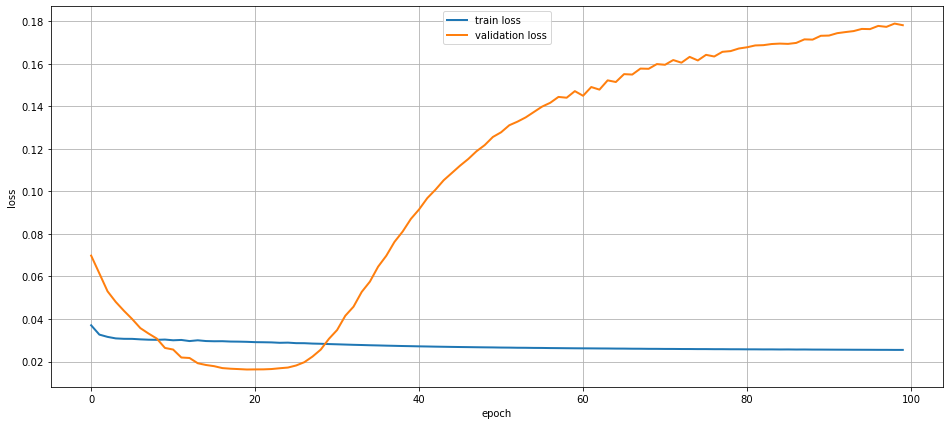

In [25]:
plt.plot(history.losses)
plt.plot(history.val_losses)

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss','validation loss'], loc='upper center')
plt.show()

model evaluation

In [26]:
scores = model.evaluate(features_train, labels_train, batch_size=1) # 훈련데이터로 평가
scores = model.evaluate(features_val, labels_val, batch_size=1)     # 밸리데이션 데이터로 평가

21/21 [==============================] - 0s 2ms/step - loss: 0.0162 - mean_squared_error: 0.0162 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 40.6294


inferencing

In [14]:
# 예측 모델에 들어갈 초기값 설정
seq_in = scaled_train[-time_step:]

# 예측구간 계산을 위해 평균값과 표준편차, 상한, 하한을 담을 그릇 선언
mean_pred_val = []

# 몇 개를 예측할지 정의
pred_count = (df.index[-1]-train.index[-1]).days      # 미래의 7일을 예측.

# 반복적인 예측을 수행하기 위해 for loop 구성 -> pred_count 만큼 반복
for i in range(pred_count):
    
    # 예측 모델에 들어가는 input 데이터 구성
    sample_in = np.array(seq_in)
    sample_in = np.reshape(seq_in, (seq_in.shape[1], seq_in.shape[0], 1)) # 샘플 수, 타입스텝 수, 속성 수

    
    # 실제 예측(prediction)
    pred_out = model.predict(sample_in)
 

    # 예측값을 다시 입력 데이터에 추가
    seq_in = np.append(seq_in, np.reshape(pred_out[0], (1,1)), axis = 0)
    seq_in = np.delete(seq_in, [0], axis = 0)
    
    # 실제값으로 표현하기 위해 inverse 스케일링
    pred = scaler.inverse_transform(pred_out)
    mean_pred_val.append(pred)
        
    # 반복 횟수를 출력
    print(i+1, '/', pred_count, 'days')
    

# 최종 예측값과 예측구간 상한과 하한을 데이터 프레임으로 만들기
pred_df = pd.DataFrame({'mean_predict_value':mean_pred_val},
                        index = pd.date_range(start = df.index[-pred_count], periods = pred_count, freq='D'))

1 / 7 days
2 / 7 days
3 / 7 days
4 / 7 days
5 / 7 days
6 / 7 days
7 / 7 days


visualization

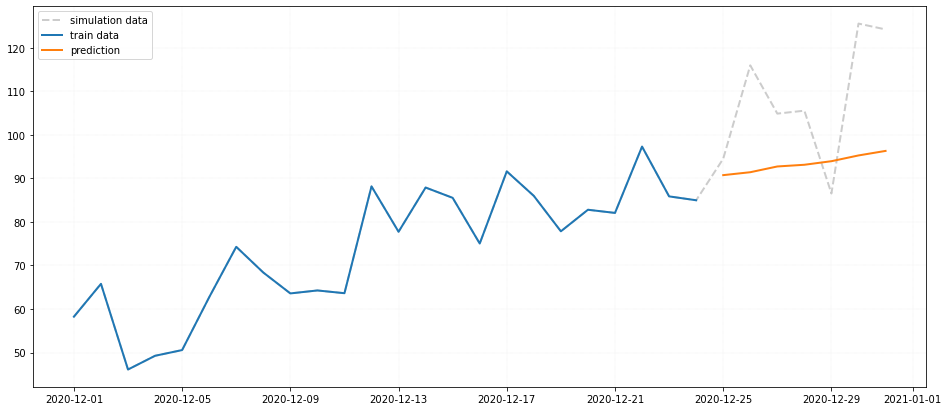

In [15]:
plt.plot(df['2020-12-01':], color = 'grey', alpha = 0.4, linestyle = 'dashed', lw = 2)
plt.plot(train['2020-12-01':])
plt.plot(pred_df['mean_predict_value'])

plt.grid(True, lw=0.1, linestyle = 'dashed')
plt.legend(['simulation data','train data','prediction','95% CI'])